reference:
- http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
- https://stackoverflow.com/questions/32032543/how-can-i-overcome-this-key-word-error

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
# need download ffmpeg to enable animation. Set the proper path of ffmpeg
plt.rcParams['animation.ffmpeg_path'] = 'E:\\tools\\ffmpeg-3.4.1-win64-static\\bin\\ffmpeg.exe'

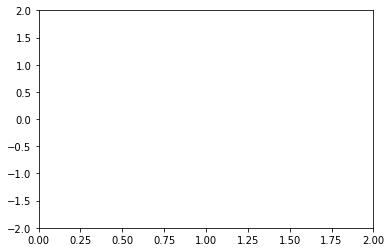

In [4]:
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot

fig, ax = plt.subplots()

ax.set_xlim((0, 2))
ax.set_ylim((-2, 2))

line, =ax.plot([], [], lw=2)

In [5]:
# initialization function: plot the backgroud of each frame
def init():
    line.set_data([], [])
    return (line, )

In [6]:
# animation function. this is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x-0.01 * i))
    line.set_data(x, y)
    return (line, )

In [7]:
# blit=True means only re-draw the parts that have changed
anim = animation.FuncAnimation(fig, animate, init_func = init, 
                              frames = 100, interval = 120, blit=True)

In [8]:
print(plt.rcParams['animation.writer'])

ffmpeg


In [9]:
HTML(anim.to_html5_video())

In [10]:
anim

In [11]:
anim._repr_html_() is None

True

In [12]:
rc('animation', html='html5')

In [13]:
anim